import packages

In [2]:
#import more packages according to your need

import torch
import torch.nn as nn
import torch.optim as optim
import torchvision.datasets as datasets
import torchvision.models as models
import torchvision.transforms as transforms
from torch.utils.data import DataLoader, random_split, SubsetRandomSampler
from skimage.util import random_noise
import cv2
import numpy as np
import matplotlib.pyplot as plt
from random import randrange
import math
import torch.optim as optim

download cifar10 dataset

In [3]:
# standard cast into Tensor and pixel values normalization in [-1, 1] range
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5)),
])

In [4]:
train_data=datasets.CIFAR10('data',train=True,download=True,transform=transform)
test_data=datasets.CIFAR10('data',train=False,download=True,transform=transform)

100%|██████████| 170498071/170498071 [00:05<00:00, 28942238.26it/s]


Extracting data/cifar-10-python.tar.gz to data
Files already downloaded and verified


prepare data & dataloader

In [5]:
num_workers=2 # number of subprocesses to use for data loading
batch_size= 128
valid_size=0.2 # percentage of training set to use as validation
train_length = len(train_data)
indices=list(range(train_length)) # obtain training indices that will be used for validation
split = int(np.floor(valid_size * train_length))

np.random.shuffle(indices) # randomly shuffle data indeces

train_idx, valid_idx = indices[split:], indices[:split]

# define samplers for obtaining training and validation batches
train_sampler=SubsetRandomSampler(train_idx)
validation_sampler=SubsetRandomSampler(valid_idx)

# define data loaders
train_loader=DataLoader(train_data,num_workers=num_workers,batch_size=batch_size,sampler=train_sampler)
validation_loader=DataLoader(train_data,num_workers=num_workers,batch_size=batch_size,sampler=validation_sampler)
test_loader=DataLoader(test_data,shuffle=True,num_workers=num_workers,batch_size=batch_size)

visualize some data

In [6]:
noise_dataiter = iter(train_loader)
data = next(noise_dataiter)
noise_imgs, noise_labels = data

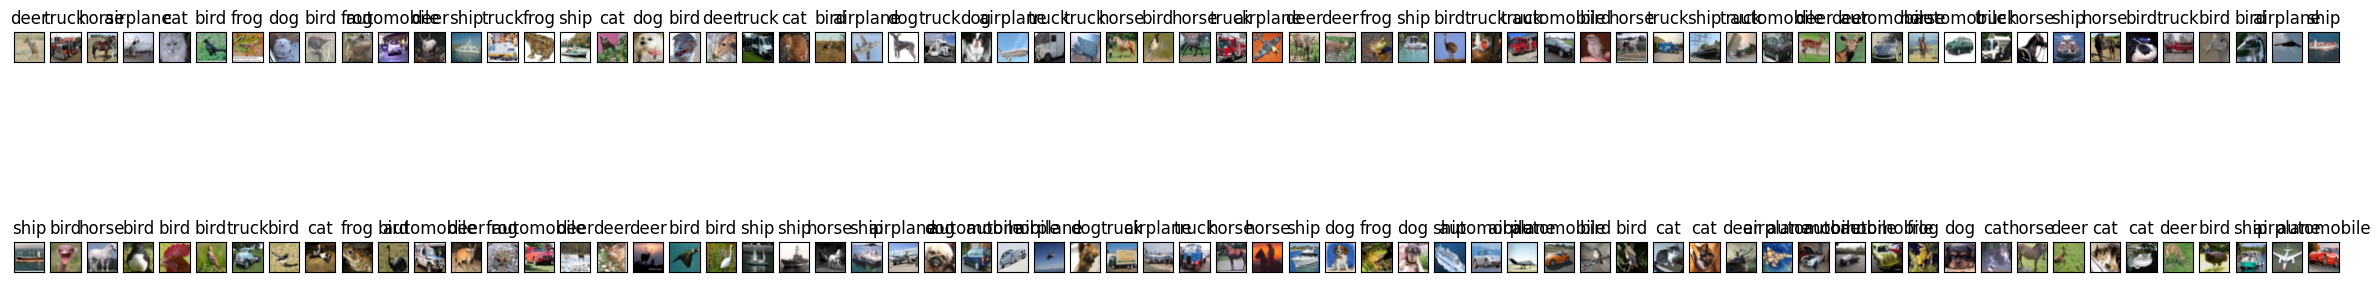

In [7]:
classes=['airplane', 'automobile', 'bird', 'cat', 'deer',
           'dog', 'frog', 'horse', 'ship', 'truck']
def RGBshow(img):
    img=img*0.5+0.5
    plt.imshow(np.transpose(img,(1,2,0)))

fig=plt.figure(1,figsize=(30,5))
for idx in range(batch_size):
    # print("idx: ", idx)
    ax=fig.add_subplot(2,int(batch_size/2),idx+1,xticks=[],yticks=[])
    RGBshow(noise_imgs[idx])
    ax.set_title(classes[noise_labels[idx]])

### define convolutional neural network

neural network architecture

In [ ]:
###################your code here###################
import torch.nn as nn
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        
        # Convolutional layers
        self.conv1 = nn.Conv2d(3, 16, 5)
        self.conv2 = nn.Conv2d(16, 32, 5)
        self.conv3 = nn.Conv2d(32, 64, 5)
        self.conv4 = nn.Conv2d(64, 128, 5)

        self.pool = nn.MaxPool2d(kernel_size=2, stride=2)
        
        # Fully connected layers
        self.fc1 = nn.Linear(128 * 2 * 2, 256)
        self.fc2 = nn.Linear(256, 128)
        self.fc3 = nn.Linear(128, 10)
        
    def forward(self, x):
        # Convolutional layers
        x = self.conv1(x)
        x = nn.functional.relu(x)
        x = self.pool(x)

        x = self.conv2(x)
        x = nn.functional.relu(x)

        x = self.conv3(x)
        x = nn.functional.relu(x)
        x = self.conv4(x)
        x = nn.functional.relu(x)

        x = x.view(-1, 128 * 2 * 2)

        x = self.fc1(x)
        x = nn.functional.relu(x)

        x = self.fc2(x)
        x = nn.functional.relu(x)

        x = self.fc3(x)
        
        return x


loss function & optimizer

In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

net = Net().to(device)

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(net.parameters(), lr=0.001)

train & validation process

In [ ]:
train_acc1 = []
train_loss1 = []
val_acc1 = []
val_loss1 = []

In [ ]:
###################your code here###################

# Training loop
num_epochs = 8
for epoch in range(num_epochs):
    running_loss = 0.0
    correct = 0
    total = 0
    for i, data in enumerate(train_loader, 0):
        inputs, labels = data[0].to(device), data[1].to(device)
        optimizer.zero_grad()
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()

         # compute accuracy
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

    # Validation
    val_loss11 = 0.0
    val_correct = 0
    val_total = 0
    with torch.no_grad():
        for data in validation_loader:
            images, labels = data[0].to(device), data[1].to(device)
            outputs = net(images)
            loss = criterion(outputs, labels)
            val_loss11 += loss.item()

            _, predicted = torch.max(outputs.data, 1)
            val_total += labels.size(0)
            val_correct += (predicted == labels).sum().item()
    
    train_acc11 = correct / total
    val_acc11 = val_correct / val_total
    train_acc1.append(train_acc11)
    train_loss1.append(running_loss/len(train_loader))
    val_acc1.append(val_acc11)
    val_loss1.append(val_loss11/len(validation_loader))
    print(f"Epoch {epoch + 1}/{num_epochs}: Training Loss: {running_loss/len(train_loader):.3f}, Training Accuracy: {100 * train_acc11:.2f}%, Validation Loss: {val_loss11/len(validation_loader):.3f}, Validation Accuracy: {100 * val_acc11:.2f}%")
print("Finished training")


Epoch 1/8: Training Loss: 1.602, Training Accuracy: 39.47%, Validation Loss: 1.473, Validation Accuracy: 45.37%
Epoch 2/8: Training Loss: 1.339, Training Accuracy: 51.29%, Validation Loss: 1.330, Validation Accuracy: 52.22%
Epoch 3/8: Training Loss: 1.190, Training Accuracy: 57.42%, Validation Loss: 1.201, Validation Accuracy: 57.66%
Epoch 4/8: Training Loss: 1.084, Training Accuracy: 61.42%, Validation Loss: 1.062, Validation Accuracy: 62.46%
Epoch 5/8: Training Loss: 0.985, Training Accuracy: 65.10%, Validation Loss: 1.015, Validation Accuracy: 63.76%
Epoch 6/8: Training Loss: 0.911, Training Accuracy: 67.77%, Validation Loss: 1.017, Validation Accuracy: 64.03%
Epoch 7/8: Training Loss: 0.846, Training Accuracy: 70.08%, Validation Loss: 0.951, Validation Accuracy: 66.81%
Epoch 8/8: Training Loss: 0.791, Training Accuracy: 72.20%, Validation Loss: 0.955, Validation Accuracy: 67.08%
Finished training


In [ ]:
history1 = {'loss': train_loss1, 'val_loss': val_loss1, 'acc':train_acc1, 'val_acc':val_acc1}

Text(0.5, 1.0, 'Accuracy Evolution')

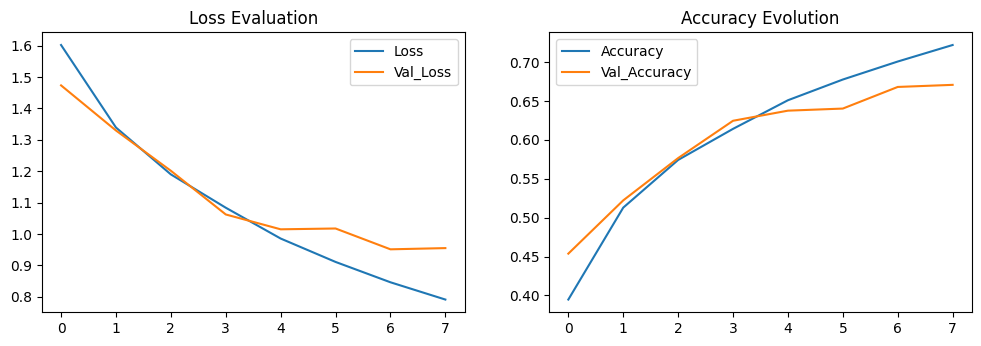

In [ ]:
plt.figure(figsize=(12,8))
plt.subplot(2,2,1)
plt.plot(history1['loss'], label='Loss')
plt.plot(history1['val_loss'],label='Val_Loss')
plt.legend()
plt.title('Loss Evaluation')

plt.subplot(2,2,2)
plt.plot(history1['acc'], label='Accuracy')
plt.plot(history1['val_acc'],label='Val_Accuracy')
plt.legend()
plt.title('Accuracy Evolution')

test process

In [ ]:
###################your code here###################
# Testing
correct = 0
total = 0
with torch.no_grad():
    for data in test_loader:
        images, labels = data
        images, labels = images.to(device), labels.to(device) # pass tensors to device
        outputs = net(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f"Accuracy of the network on the 10000 test images: {100 * correct / total}%")

Accuracy of the network on the 10000 test images: 66.89%


### optimize convolutional neural network

neural network architecture

In [ ]:
###################your code here###################
class EnhancedNet(nn.Module):
    def __init__(self):
        super(EnhancedNet, self).__init__()
        
        # Load pre-trained ResNet50 model
        self.resnet = models.resnet50(pretrained=True)
        
        # Modify the last layer for our classification task
        num_ftrs = self.resnet.fc.in_features
        self.resnet.fc = nn.Linear(num_ftrs, 10)
        
    def forward(self, x):
        x = self.resnet(x)
        return x

loss function & optimizer

In [ ]:
###################your code here###################
# Loss and optimizer
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

net = EnhancedNet().to(device)

criterion = nn.CrossEntropyLoss().to('cuda')
optimizer = optim.Adam(net.parameters())

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet50-0676ba61.pth" to /root/.cache/torch/hub/checkpoints/resnet50-0676ba61.pth
100%|██████████| 97.8M/97.8M [00:00<00:00, 194MB/s]


train & validation process

In [ ]:
train_acc = []
train_loss = []
val_acc = []
val_loss = []

In [ ]:
###################your code here###################
net = net.to('cuda')
num_epochs = 8
for epoch in range(num_epochs):
    running_loss = 0.0
    correct = 0
    total = 0
    for i, data in enumerate(train_loader, 0):
        inputs, labels = data[0].to(device), data[1].to(device)
        optimizer.zero_grad()
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()

        # compute accuracy
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

    # Validation
    val_loss1 = 0.0
    val_correct = 0
    val_total = 0
    with torch.no_grad():
        for data in validation_loader:
            images, labels = data[0].to(device), data[1].to(device)
            outputs = net(images)
            loss = criterion(outputs, labels)
            val_loss1 += loss.item()

            # compute accuracy
            _, predicted = torch.max(outputs.data, 1)
            val_total += labels.size(0)
            val_correct += (predicted == labels).sum().item()
    
    train_acc1 = correct / total
    val_acc1 = val_correct / val_total
    train_acc.append(train_acc1)
    train_loss.append(running_loss/len(train_loader))
    val_acc.append(val_acc1)
    val_loss.append(val_loss1/len(validation_loader))
    print(f"Epoch {epoch + 1}/{num_epochs}, Training Loss: {running_loss/len(train_loader):.3f}, Training Accuracy: {100 * train_acc1:.2f}%, Validation Loss: {val_loss1/len(validation_loader):.3f}, Validation Accuracy: {100 * val_acc1:.2f}%")
print("Finished training")

Epoch 1/8, Training Loss: 0.804, Training Accuracy: 73.05%, Validation Loss: 0.703, Validation Accuracy: 76.82%
Epoch 2/8, Training Loss: 0.551, Training Accuracy: 81.59%, Validation Loss: 0.655, Validation Accuracy: 77.86%
Epoch 3/8, Training Loss: 0.427, Training Accuracy: 85.37%, Validation Loss: 0.591, Validation Accuracy: 80.46%
Epoch 4/8, Training Loss: 0.329, Training Accuracy: 88.82%, Validation Loss: 0.620, Validation Accuracy: 80.88%
Epoch 5/8, Training Loss: 0.264, Training Accuracy: 91.06%, Validation Loss: 0.630, Validation Accuracy: 80.75%
Epoch 6/8, Training Loss: 0.257, Training Accuracy: 91.39%, Validation Loss: 0.665, Validation Accuracy: 80.99%
Epoch 7/8, Training Loss: 0.193, Training Accuracy: 93.42%, Validation Loss: 0.691, Validation Accuracy: 81.34%
Epoch 8/8, Training Loss: 0.144, Training Accuracy: 95.01%, Validation Loss: 0.741, Validation Accuracy: 80.11%
Finished training


In [ ]:
history2 = {'loss': train_loss, 'val_loss': val_loss, 'acc':train_acc, 'val_acc':val_acc}

Text(0.5, 1.0, 'Accuracy Evolution')

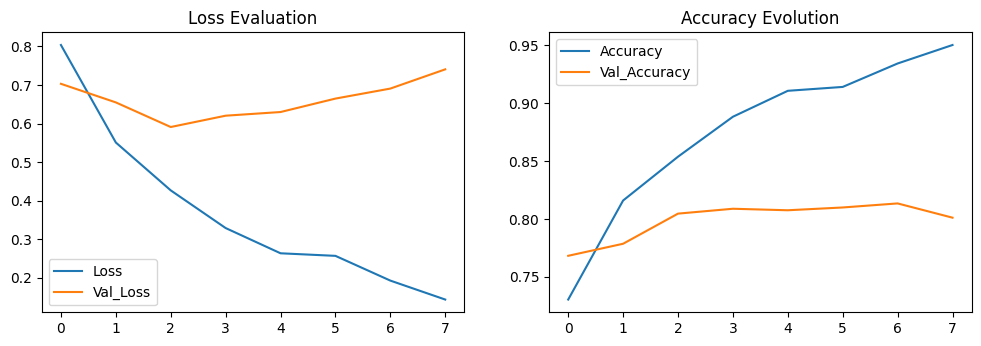

In [ ]:
plt.figure(figsize=(12,8))
plt.subplot(2,2,1)
plt.plot(history2['loss'], label='Loss')
plt.plot(history2['val_loss'],label='Val_Loss')
plt.legend()
plt.title('Loss Evaluation')

plt.subplot(2,2,2)
plt.plot(history2['acc'], label='Accuracy')
plt.plot(history2['val_acc'],label='Val_Accuracy')
plt.legend()
plt.title('Accuracy Evolution')

test process

In [ ]:
###################your code here###################

# Testing
correct = 0
total = 0
with torch.no_grad():
    for data in test_loader:
        images, labels = data
        images, labels = images.to(device), labels.to(device) # pass tensors to device
        outputs = net(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f"Accuracy of the network on the 10000 test images: {100 * correct / total}%")


Accuracy of the network on the 10000 test images: 80.42%


Text(0.5, 1.0, 'Accuracy Evolution')

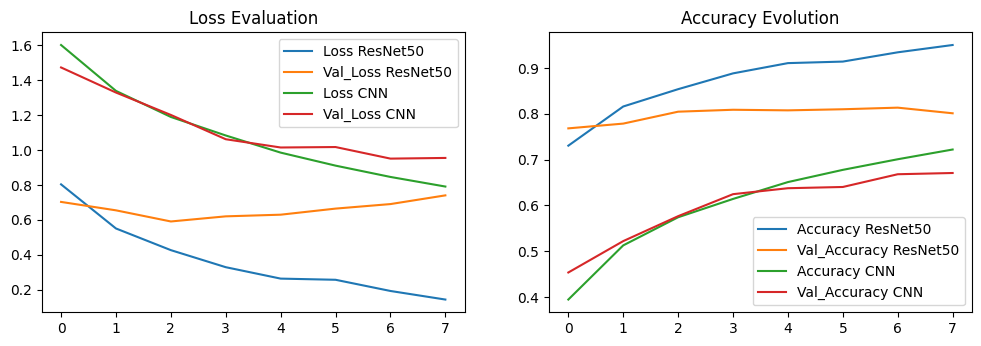

In [ ]:
plt.figure(figsize=(12,8))
plt.subplot(2,2,1)
plt.plot(history2['loss'], label='Loss ResNet50')
plt.plot(history2['val_loss'],label='Val_Loss ResNet50')
plt.plot(history1['loss'], label='Loss CNN')
plt.plot(history1['val_loss'],label='Val_Loss CNN')
plt.legend()
plt.title('Loss Evaluation')

plt.subplot(2,2,2)
plt.plot(history2['acc'], label='Accuracy ResNet50')
plt.plot(history2['val_acc'],label='Val_Accuracy ResNet50')
plt.plot(history1['acc'], label='Accuracy CNN')
plt.plot(history1['val_acc'],label='Val_Accuracy CNN')
plt.legend()
plt.title('Accuracy Evolution')

### unet network

add salt & pepper noise to data

In [8]:
class SaltAndPepper:
    # add salt & pepper to noise by a specific factor
    def __init__(self, noise_factor):
        self.noise_factor = noise_factor

    def __call__(self, img):
        salt_img = torch.tensor(random_noise(img, mode="s&p", clip=True, amount=self.noise_factor))
        return salt_img, img

In [9]:
noise_transform=transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5)),
    SaltAndPepper(0.07)
])

download & transform data

In [10]:
noisy_train_data=datasets.CIFAR10('noisy_data',train=True,download=True,transform=noise_transform)
noisy_test_data=datasets.CIFAR10('noisy_data',train=False,download=True,transform=noise_transform)

100%|██████████| 170498071/170498071 [00:06<00:00, 26700353.26it/s]


Extracting noisy_data/cifar-10-python.tar.gz to noisy_data
Files already downloaded and verified


In [11]:
num_workers=2 # number of subprocesses to use for data loading
batch_size= 64
valid_size=0.2 # percentage of training set to use as validation
train_length = len(noisy_train_data)
indices=list(range(train_length)) # obtain training indices that will be used for validation
split = int(np.floor(valid_size * train_length))

np.random.shuffle(indices) # randomly shuffle data indeces

train_idx, valid_idx = indices[split:], indices[:split]

# define samplers for obtaining training and validation batches
train_sampler=SubsetRandomSampler(train_idx)
validation_sampler=SubsetRandomSampler(valid_idx)

# define data loaders
noisy_train_loader = DataLoader(noisy_train_data,num_workers=num_workers,batch_size=batch_size,sampler=train_sampler)
noisy_validation_loader = DataLoader(noisy_train_data,num_workers=num_workers,batch_size=batch_size,sampler=validation_sampler)
noisy_test_loader = DataLoader(noisy_test_data,shuffle=True,num_workers=num_workers,batch_size=batch_size)

visualize some data

In [12]:
noise_dataiter = iter(noisy_train_loader)
data = next(noise_dataiter)
(noise_imgs, org_img), noise_labels = data

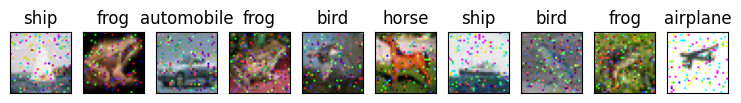

In [13]:
classes=['airplane', 'automobile', 'bird', 'cat', 'deer',
           'dog', 'frog', 'horse', 'ship', 'truck']
def RGBshow(img):
    img=img*0.5+0.5
    plt.imshow(np.transpose(img,(1,2,0)))

fig=plt.figure(1,figsize=(30,5))
for idx in range(10):#batch_size):
    ax = fig.add_subplot(2,int(batch_size/2),idx+1,xticks=[],yticks=[])
    RGBshow(noise_imgs[idx])
    ax.set_title(classes[noise_labels[idx]])

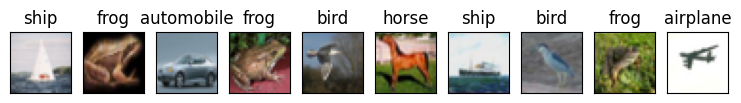

In [14]:
classes=['airplane', 'automobile', 'bird', 'cat', 'deer',
           'dog', 'frog', 'horse', 'ship', 'truck']
def RGBshow(img):
    img=img*0.5+0.5
    plt.imshow(np.transpose(img,(1,2,0)))

fig=plt.figure(1,figsize=(30,5))
for idx in range(10):#batch_size):
    ax = fig.add_subplot(2,int(batch_size/2),idx+1,xticks=[],yticks=[])
    RGBshow(org_img[idx])
    ax.set_title(classes[noise_labels[idx]])

neural network architecture

In [15]:
class conv_block(nn.Module):
    def __init__(self, in_c, out_c):
        super().__init__()
        self.conv1 = nn.Conv2d(in_c, out_c, kernel_size=3, padding=1)

        self.bn1 = nn.BatchNorm2d(out_c)
        self.conv2 = nn.Conv2d(out_c, out_c, kernel_size=3, padding=1)
        self.bn2 = nn.BatchNorm2d(out_c)
        self.relu = nn.ReLU()
    def forward(self, inputs):

        x = self.conv1(inputs)
        x = self.bn1(x)
        x = self.relu(x)
        x = self.conv2(x)
        x = self.bn2(x)
        x = self.relu(x)
        return x
class decoder_block(nn.Module):
    def __init__(self, in_c, out_c):
        super().__init__()
        self.up = nn.ConvTranspose2d(in_c, out_c, kernel_size=2, stride=2, padding=0)
        self.conv = conv_block(out_c+out_c, out_c)
    def forward(self, inputs, skip):
        x = self.up(inputs)
        x = torch.cat([x, skip], axis=1)
        x = self.conv(x)
        return x

class encoder_block(nn.Module):
    def __init__(self, in_c, out_c):
        super().__init__()
        self.conv = conv_block(in_c, out_c)
        self.pool = nn.MaxPool2d((2, 2))
    def forward(self, inputs):
        x = self.conv(inputs)
        p = self.pool(x)
        return x, p

class UNet(nn.Module):
    def __init__(self):
        super().__init__()
        #Encoder
        self.e1 = encoder_block(3, 64)
        self.e2 = encoder_block(64, 128)
        self.e3 = encoder_block(128, 256)
        self.e4 = encoder_block(256, 512)
        #Bottleneck
        self.b = conv_block(512, 1024)
        #Decoder
        self.d1 = decoder_block(1024, 512)
        self.d2 = decoder_block(512, 256)
        self.d3 = decoder_block(256, 128)
        self.d4 = decoder_block(128, 64)
        #Classifier
        self.outputs = nn.Conv2d(64, 3, kernel_size=1, padding=0)
    def forward(self, inputs):
        #Encoder
        s1, p1 = self.e1(inputs)
        s2, p2 = self.e2(p1)
        s3, p3 = self.e3(p2)
        s4, p4 = self.e4(p3)
        #Bottleneck
        b = self.b(p4)
        #Decoder
        d1 = self.d1(b, s4)
        d2 = self.d2(d1, s3)
        d3 = self.d3(d2, s2)
        d4 = self.d4(d3, s1)
        #Classifier
        outputs = self.outputs(d4)
        return outputs

loss function & optimizer

In [16]:
###################your code here###################
# Set up the model, loss function, and optimizer
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = UNet().to("cuda")

criterion = nn.MSELoss().to("cuda")
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

train & validation process

In [17]:
train_loss22 = []
val_loss22 = []

In [18]:
###################your code here###################

# Train the model]
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
num_epochs = 10
for epoch in range(num_epochs):
    running_loss = 0.0
    for i, ((noisy_image, org_image),_) in enumerate(noisy_train_loader):
      
        noisy_image.to(device)
        org_image.to(device)
        model.train()
        outputs = model(noisy_image.to(device)).to(device)
        optimizer.zero_grad()
        loss = criterion(outputs, org_image.to(device)).to(device)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()

           # Compute training loss
    train_loss1 = running_loss / len(noisy_train_loader)
    train_loss22.append(train_loss1)

    model.eval()
    val_loss1 = 0
    with torch.no_grad():
        for i, ((noisy_image, org_image),_) in enumerate(noisy_validation_loader):

            noisy_image.to(device)
            org_image.to(device)
            outputs = model(noisy_image.to(device)).to(device)
            loss = criterion(outputs, org_image.to(device)).to(device)
            val_loss1 += loss.item()

        val_loss1 /= len(noisy_validation_loader)
        val_loss22.append(val_loss1)

        print(f'Epoch [{epoch+1}/{num_epochs}], Training Loss: {train_loss1:.4f}, Validation Loss: {val_loss1:.4f}')

Epoch [1/10], Training Loss: 0.0113, Validation Loss: 0.0042
Epoch [2/10], Training Loss: 0.0044, Validation Loss: 0.0020
Epoch [3/10], Training Loss: 0.0034, Validation Loss: 0.0017
Epoch [4/10], Training Loss: 0.0030, Validation Loss: 0.0011
Epoch [5/10], Training Loss: 0.0026, Validation Loss: 0.0015
Epoch [6/10], Training Loss: 0.0023, Validation Loss: 0.0015
Epoch [7/10], Training Loss: 0.0024, Validation Loss: 0.0016
Epoch [8/10], Training Loss: 0.0023, Validation Loss: 0.0007
Epoch [9/10], Training Loss: 0.0022, Validation Loss: 0.0017
Epoch [10/10], Training Loss: 0.0021, Validation Loss: 0.0015


In [19]:
history22 = {'loss': train_loss22, 'val_loss': val_loss22}

Text(0.5, 1.0, 'Loss Evaluation')

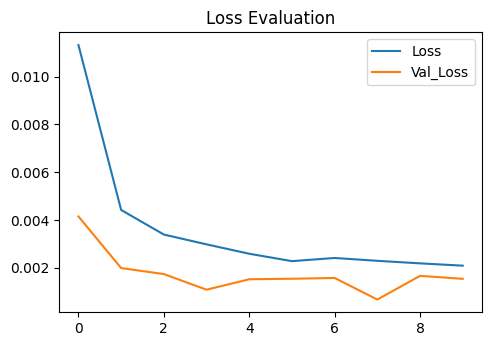

In [20]:
plt.figure(figsize=(12,8))
plt.subplot(2,2,1)
plt.plot(history22['loss'], label='Loss')
plt.plot(history22['val_loss'],label='Val_Loss')
plt.legend()
plt.title('Loss Evaluation')

test process

In [21]:
noise_dataiter = iter(noisy_test_loader)
data = next(noise_dataiter)
(noise_imgs, normal_imgs), noise_labels = data

In [22]:
model.eval()

with torch.no_grad():
    noise_imgs = noise_imgs.to(device)
    denoise_imgs1 = model(noise_imgs).cpu()

noise_imgs = noise_imgs.cpu()

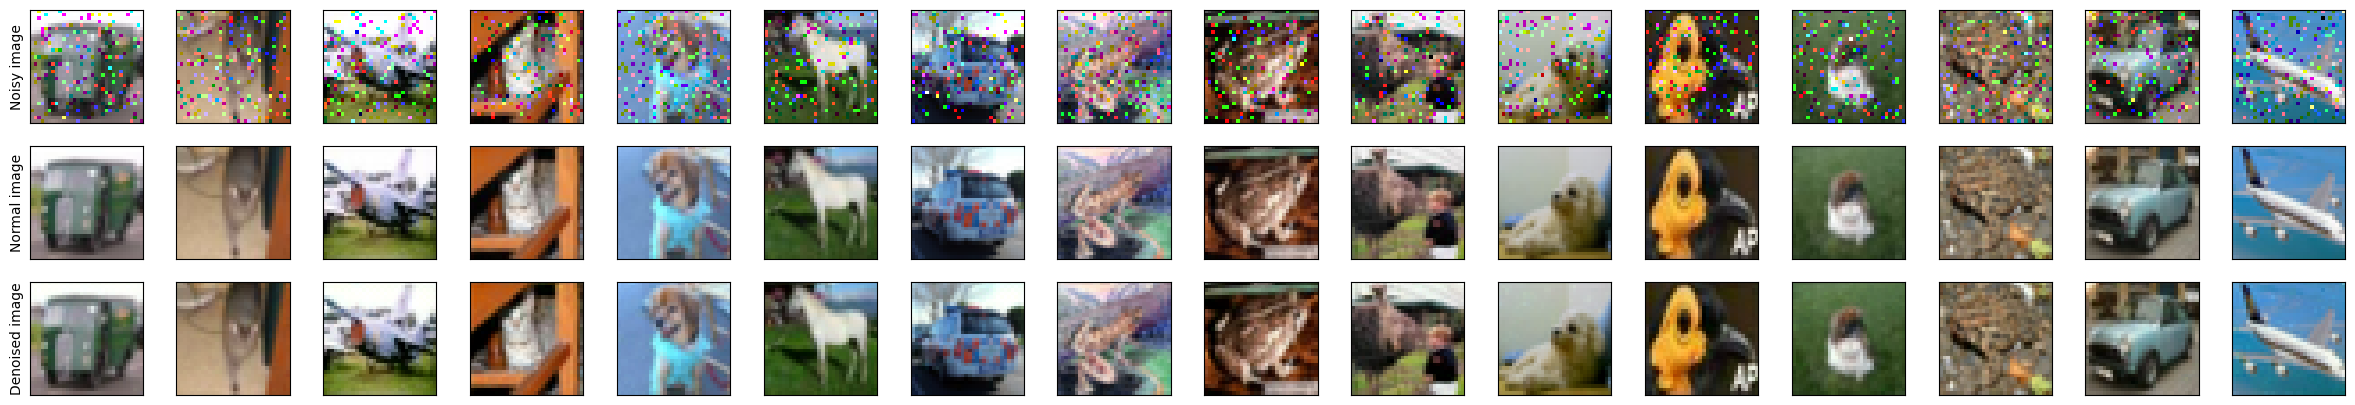

In [23]:
def RGBshow(img):
    img = img * 0.5 + 0.5
    plt.imshow(np.transpose(img, (1, 2, 0)))

fig = plt.figure(1, figsize=(30, 5))
for idx in range(16):
    ax = fig.add_subplot(3, 16, idx+1, xticks=[], yticks=[])
    if idx == 0:
        plt.ylabel('Noisy image')
    RGBshow(noise_imgs[idx])

    ax = fig.add_subplot(3, 16, idx+17, xticks=[], yticks=[])
    if idx == 0:
        plt.ylabel('Normal image')
    RGBshow(normal_imgs[idx])

    ax = fig.add_subplot(3, 16, idx+33, xticks=[], yticks=[])
    if idx == 0:
        plt.ylabel('Denoised image')
    RGBshow(denoise_imgs1[idx])
    
plt.show()


### optimize unet (optional)

neural network architecture

In [24]:
###################your code here###################

class AttentionBlock(nn.Module):
    def __init__(self, in_channels_g, in_channels_x, inter_channels):
        super(AttentionBlock, self).__init__()
        self.theta_x = nn.Conv2d(in_channels_x, inter_channels, kernel_size=1, stride=1, padding=0)
        self.phi_g = nn.Conv2d(in_channels_g, inter_channels, kernel_size=1, stride=1, padding=0)
        self.relu = nn.ReLU(inplace=True)
        self.psi_f = nn.Conv2d(inter_channels, 1, kernel_size=1, stride=1, padding=0)
        self.sigmoid = nn.Sigmoid()

    def forward(self, g, x):
        theta_x = self.theta_x(x)
        phi_g = self.phi_g(g)
        f = self.relu(theta_x + phi_g)
        psi_f = self.psi_f(f)
        rate = self.sigmoid(psi_f)
        att_x = torch.mul(x, rate)
        return att_x

class ConvBlock(nn.Module):
    def __init__(self, in_channels, out_channels):
        super(ConvBlock, self).__init__()
        self.conv1 = nn.Conv2d(in_channels, out_channels, kernel_size=3, stride=1, padding=1)
        self.conv2 = nn.Conv2d(out_channels, out_channels, kernel_size=3, stride=1, padding=1)
        self.relu = nn.ReLU(inplace=True)

    def forward(self, x):
        x = self.relu(self.conv1(x))
        x = self.relu(self.conv2(x))
        return x

class UNetWithAttention(nn.Module):
    def __init__(self, in_channels=3, out_channels=3):
        super(UNetWithAttention, self).__init__()
        self.conv1 = ConvBlock(in_channels, 64)
        self.pool1 = nn.MaxPool2d(kernel_size=2, stride=2)
        self.conv2 = ConvBlock(64, 128)
        self.pool2 = nn.MaxPool2d(kernel_size=2, stride=2)
        self.conv3 = ConvBlock(128, 256)
        self.pool3 = nn.MaxPool2d(kernel_size=2, stride=2)
        self.conv4 = ConvBlock(256, 512)
        self.pool4 = nn.MaxPool2d(kernel_size=2, stride=2)
        self.conv5 = ConvBlock(512, 1024)
        self.up6 = nn.ConvTranspose2d(1024, 512, kernel_size=2, stride=2)
        self.attention6 = AttentionBlock(512, 512, 256)
        self.conv6 = ConvBlock(1024, 512)
        self.up7 = nn.ConvTranspose2d(512, 256, kernel_size=2, stride=2)
        self.attention7 = AttentionBlock(256, 256, 128)
        self.conv7 = ConvBlock(512, 256)
        self.up8 = nn.ConvTranspose2d(256, 128, kernel_size=2, stride=2)
        self.attention8 = AttentionBlock(128, 128, 64)
        self.conv8 = ConvBlock(256, 128)
        self.up9 = nn.ConvTranspose2d(128, 64, kernel_size=2, stride=2)
        self.attention9 = AttentionBlock(64, 64, 32)
        self.conv9 = ConvBlock(128, 64)
        self.conv10 = nn.Conv2d(64, out_channels, kernel_size=1)
    def forward(self, x):
        # Encoder
        x1 = self.conv1(x)
        x2 = self.conv2(self.pool1(x1))
        x3 = self.conv3(self.pool2(x2))
        x4 = self.conv4(self.pool3(x3))
        x5 = self.conv5(self.pool4(x4))
        # Decoder
        x6 = self.conv6(torch.cat([self.attention6(g=x4, x=self.up6(x5)), x4], dim=1))
        x7 = self.conv7(torch.cat([self.attention7(g=x3, x=self.up7(x6)), x3], dim=1))
        x8 = self.conv8(torch.cat([self.attention8(g=x2, x=self.up8(x7)), x2], dim=1))
        x9 = self.conv9(torch.cat([self.attention9(g=x1, x=self.up9(x8)), x1], dim=1))
        # Output
        out = self.conv10(x9)
        return out

loss function & optimizer

In [25]:
###################your code here###################
# Set up the model, loss function, and optimizer
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
modelt =  UNetWithAttention().to("cuda")
criterion = nn.MSELoss().to("cuda")
optimizer = torch.optim.Adam(modelt.parameters(), lr=0.001)

train & validation process

In [26]:
train_loss33 = []
val_loss33 = []

In [27]:
###################your code here###################

# Train the model]
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
num_epochs = 10
for epoch in range(num_epochs):
    running_loss = 0.0
    for i, ((noisy_image, org_image),_) in enumerate(noisy_train_loader):
      
        noisy_image.to(device)
        org_image.to(device)
        modelt.train()
        outputs = modelt(noisy_image.to(device)).to(device)
        optimizer.zero_grad()
        loss = criterion(outputs, org_image.to(device)).to(device)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()

    train_loss1 = running_loss / len(noisy_train_loader)
    train_loss33.append(train_loss1)

    modelt.eval()
    val_loss1 = 0
    with torch.no_grad():
        for i, ((noisy_image, org_image),_) in enumerate(noisy_validation_loader):

            noisy_image.to(device)
            org_image.to(device)

            outputs = modelt(noisy_image.to(device)).to(device)
            loss = criterion(outputs, org_image.to(device)).to(device)
            val_loss1 += loss.item()

        val_loss1 /= len(noisy_validation_loader)
        val_loss33.append(val_loss1)
        
        print(f'Epoch [{epoch+1}/{num_epochs}], Training Loss: {train_loss1:.4f}, Validation Loss: {val_loss1:.4f}')

Epoch [1/10], Training Loss: 0.0153, Validation Loss: 0.0050
Epoch [2/10], Training Loss: 0.0027, Validation Loss: 0.0019
Epoch [3/10], Training Loss: 0.0016, Validation Loss: 0.0012
Epoch [4/10], Training Loss: 0.0012, Validation Loss: 0.0010
Epoch [5/10], Training Loss: 0.0010, Validation Loss: 0.0008
Epoch [6/10], Training Loss: 0.0008, Validation Loss: 0.0013
Epoch [7/10], Training Loss: 0.0006, Validation Loss: 0.0005
Epoch [8/10], Training Loss: 0.0006, Validation Loss: 0.0006
Epoch [9/10], Training Loss: 0.0005, Validation Loss: 0.0004
Epoch [10/10], Training Loss: 0.0005, Validation Loss: 0.0004


test process

In [28]:
history33= {'loss': train_loss33, 'val_loss': val_loss33}

Text(0.5, 1.0, 'Loss Evaluation')

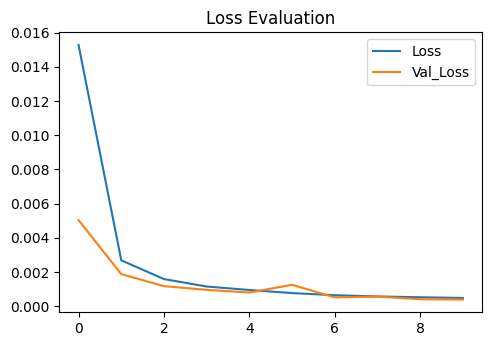

In [29]:
plt.figure(figsize=(12,8))
plt.subplot(2,2,1)
plt.plot(history33['loss'], label='Loss')
plt.plot(history33['val_loss'],label='Val_Loss')
plt.legend()
plt.title('Loss Evaluation')

In [30]:
noise_dataiter = iter(noisy_test_loader)
data = next(noise_dataiter)
(noise_imgs, normal_imgs), noise_labels = data

In [31]:
model.eval()

with torch.no_grad():
    noise_imgs = noise_imgs.to(device)
    denoise_imgs2 = modelt(noise_imgs).cpu()

noise_imgs = noise_imgs.cpu()

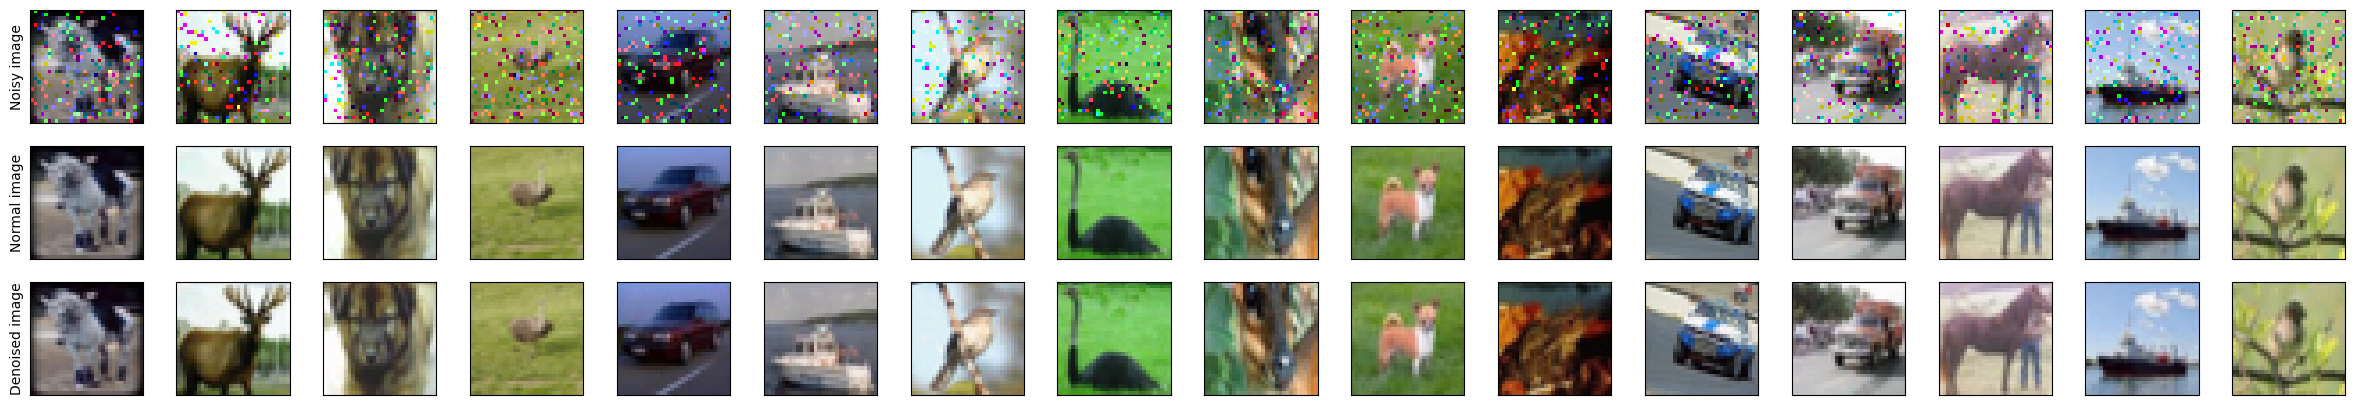

In [32]:
def RGBshow(img):
    img = img * 0.5 + 0.5
    plt.imshow(np.transpose(img, (1, 2, 0)))

fig = plt.figure(1, figsize=(30, 5))
for idx in range(16):
    ax = fig.add_subplot(3, 16, idx+1, xticks=[], yticks=[])
    if idx == 0:
        plt.ylabel('Noisy image')
    RGBshow(noise_imgs[idx])

    ax = fig.add_subplot(3, 16, idx+17, xticks=[], yticks=[])
    if idx == 0:
        plt.ylabel('Normal image')
    RGBshow(normal_imgs[idx])

    ax = fig.add_subplot(3, 16, idx+33, xticks=[], yticks=[])
    if idx == 0:
        plt.ylabel('Denoised image')
    RGBshow(denoise_imgs2[idx])
    
plt.show()


In [33]:
def PSNR(original, denoised):

    mse = np.mean((original - denoised) ** 2)

    if(mse == 0):
        return 100
    max_pixel = 255.0
    psnr = 20 * math.log10(max_pixel / math.sqrt(mse))

    return psnr

compare

Text(0.5, 1.0, 'Loss Evaluation')

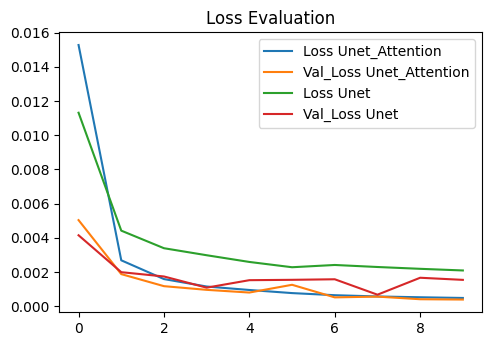

In [34]:
plt.figure(figsize=(12,8))
plt.subplot(2,2,1)
plt.plot(history33['loss'], label='Loss Unet_Attention')
plt.plot(history33['val_loss'],label='Val_Loss Unet_Attention')
plt.plot(history22['loss'], label='Loss Unet')
plt.plot(history22['val_loss'],label='Val_Loss Unet')
plt.legend()
plt.title('Loss Evaluation')


In [35]:
noise_dataiter = iter(noisy_test_loader)
data = next(noise_dataiter)
(noise_imgs, normal_imgs), noise_labels = data

In [36]:
model.eval()

with torch.no_grad():
    noise_imgs = noise_imgs.to(device)
    denoise_imgs1 = model(noise_imgs).cpu()
    denoise_imgs2 = modelt(noise_imgs).cpu()

noise_imgs = noise_imgs.cpu()

In [37]:
results = []

for index in range(len(normal_imgs)):

  noise_psnr = PSNR(normal_imgs[index].detach().cpu().numpy(), noise_imgs[index].detach().cpu().numpy())
  unet_psnr = PSNR(normal_imgs[index].detach().cpu().numpy(), denoise_imgs1[index].detach().cpu().numpy())
  attention_psnr = PSNR(normal_imgs[index].detach().cpu().numpy(), denoise_imgs2[index].detach().cpu().numpy())
  improvement = unet_psnr-attention_psnr
  result = {
    "index": index,
    "unet_psnr": unet_psnr,
    "attention_psnr": attention_psnr,
    "Improvement": improvement
  }    

  results.append(result)

sortedResults = sorted(results, key=lambda d: d['Improvement'])

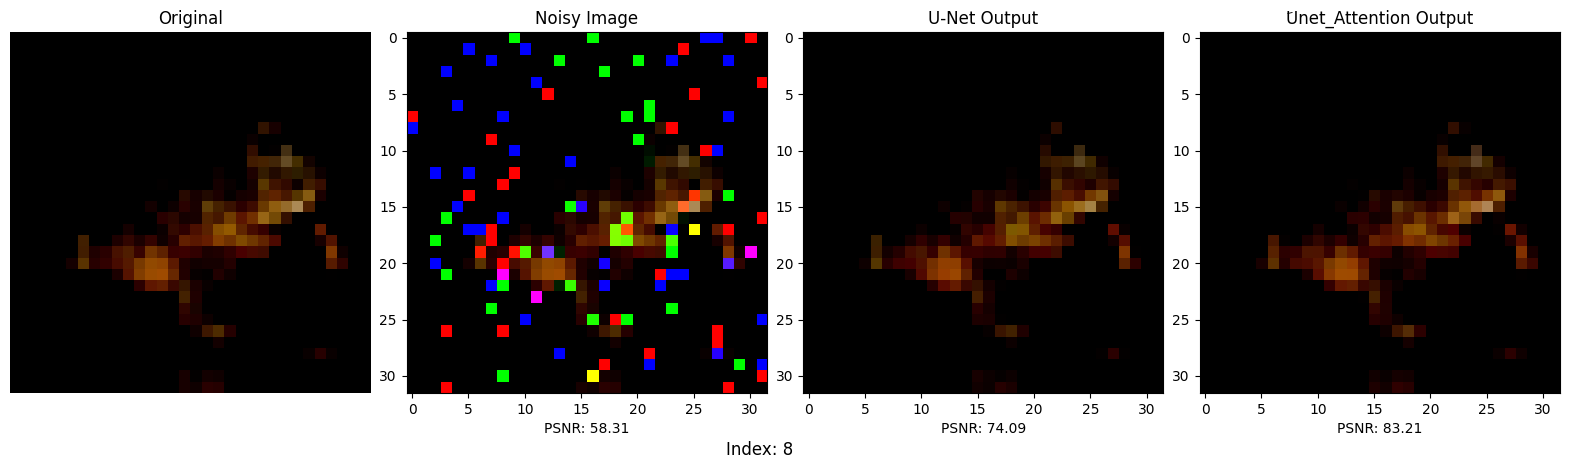

In [38]:
index = sortedResults[2]["index"]
noise_psnr = PSNR(normal_imgs[index].detach().cpu().numpy(), noise_imgs[index].detach().cpu().numpy())
unet_psnr = PSNR(normal_imgs[index].detach().cpu().numpy(), denoise_imgs1[index].detach().cpu().numpy())
attention_psnr = PSNR(normal_imgs[index].detach().cpu().numpy(), denoise_imgs2[index].detach().cpu().numpy())

fig, axs = plt.subplots(1, 4, figsize=(20, 5))

axs[0].imshow(np.transpose(normal_imgs[index], (1, 2, 0)))
axs[0].set_title('Original')
axs[0].axis('off')

axs[1].imshow(np.transpose(noise_imgs[index], (1, 2, 0)))
axs[1].set_title('Noisy Image')
axs[1].set_xlabel(f"PSNR: {noise_psnr:.2f}")
# axs[1].axis('off')

axs[2].imshow(np.transpose(denoise_imgs1[index], (1, 2, 0)))
axs[2].set_title('U-Net Output')
axs[2].set_xlabel(f"PSNR: {unet_psnr:.2f}")
# axs[2].axis('off')

axs[3].imshow(np.transpose(denoise_imgs2[index], (1, 2, 0)))
axs[3].set_title('َUnet_Attention Output')
axs[3].set_xlabel(f"PSNR: {attention_psnr:.2f}")
# axs[3].axis('off')

plt.subplots_adjust(wspace=0.1, hspace=0.1)

plt.figtext(0.5, 0.01, f"Index: {index}", ha="center", fontsize=12)
plt.show()
